<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_spring_2026/blob/main/workshops/Phys_2320_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Some relationships

In mathematics, the additive inverse of a number $n$ is the number that when added to $n$, the result is zero:

.

$n\, +\, ? = 0$

.

That number is, of course, $-n$, the negative of $n$. The multiplicative inverse of a number $n$ is the number that when multiplied times $n$, the result is one:

.

$n\, \times\, ? = 1$

.

That number is, of course, $1/n$, the reciprocal of $n$. But there are more interesting relationships, for example, the *derivative* of the function $f(x) = x^n$ with respect to $x$ is:

.

$\frac{d}{dx}f(x) = nx^{n-1}$

.

Notice that rather than a single operation, taking the derivative of $x^n$ consists of *two* operations. It is a recipe, or an algorithm: multiply the variable $x$ times the exponent $n$, then subtract 1 from the exponent. Applying the inverse operations in the inverse direction yields the following: add 1 to the exponent, then divide by the variable $x$ by the exponent (which now is $n+1$). We call this the *integral* of $x^n$:

.

$\int f(x) dx = \int x^n dx = \frac{x^{n+1}}{n+1} + C$

.

The $C$ is just a constant which is needed because without limits of integration, an infinite number of functions satisfy the equality above, but no need to worry about that now. Focus instead on the *relationships* between quantitites and on the *interpretation* of the derivative and the integral.

.

<u>Of particular importance</u>, if the derivative is approximately the slope of a function, rise $\div$ run, and the integral is the algorithmic inverse, then the integral must be approximately rise $\times$ run... <u>the area under the curve!<u>

## On integrals and computers (or why you are doing this)

When Isaac Newton first envisioned the rules of motion that describe the mechanical universe, the mathematics to describe them did not exist, so he invented them. While addition and multiplication can take us a long way, calculus is the actual language that the Universe speaks. At least the mechanical universe.

Calculus is based on infinitively small changes, but computers can only compute operations with finite numbers. Nevertheless, you can make those finite numbers as small as you want, and tell the computer to go through all of them. So while a computer cannot give you an analytical solution (a formula), it can certainly give you a numerical solution (as many numbers as you want).

Here we will use computers to understant the relationships between acceleration, velocity, and position.

# Instructions

1. Evaluate the cells below, in some cases you might need to complete the code.

2. Complete the exercises.

3. Answer the questions in the space provided.

NOTE: You do not need to know anything about pandas or lambda functions or even while loops right now. Your teaching assistant will demonstrate on the whiteboard what the code below is doing.

In [3]:
import pandas as pd

In [4]:
# These variables are used to define a quadratic function of the form At^2 + Bt + C
A = 4  #m/s^4
B = -5 #m/s^3
C = 3  #m/s^2

In [5]:
# This loop will evaluate the quadratic function with A, B, C as above
# It will save the result for each instant t so that you can plot it

time = 0
resolution = 0.01 # Δt, you can make it big or small
time_list = []    #Declare empty array  "time_list"
acceleration_list = [] # Declare empty array variable "acceleration list"
while time < 2.0: # WHILE LOOP, if "time" is LESS THAN 2, do this:
  time_list.append(time) # APPENED TIME LIST
  acceleration_list.append((lambda t: A*t**2 + B*t + C)(time)) # APPEND "acceleration_list" with the solution to the function "f(t) = 4t^2 + (-5)t+(3)""
  time = time + resolution # INCREMENT TIME BY RESOLUTION

acceleration_vs_time = pd.Series(acceleration_list, index=time_list) # DEFINE A TWO COLUMN ARRAY VARIABLE CONSISTING OF ACCEL/TIME
print(acceleration_vs_time) # This two column arrray variable will allow  us to store and graph our data later using "pandas"

#// This "while loop" first computes the acceleration at time(t = 0) using the "lamba" function defined initially as: f(t)= 4(0)^2 + (-5)(0)+(3) => 3.
# Once that acceleration has been computed, that value is then appended to the array variable "acceleration_list",
# Finally the "time" variable is incremented by the resolution "0.1", just before the loop interates itselt again.

# This "while loop" iterates a total of 200 times from t=0 to t=1.99 until the LOOP EXIT CONDITION (while time < 2.0) is met. //

0.00    3.0000
0.01    2.9504
0.02    2.9016
0.03    2.8536
0.04    2.8064
         ...  
1.95    8.4600
1.96    8.5664
1.97    8.6736
1.98    8.7816
1.99    8.8904
Length: 200, dtype: float64


<Axes: xlabel='Time (s)', ylabel='acceleration (m/s)'>

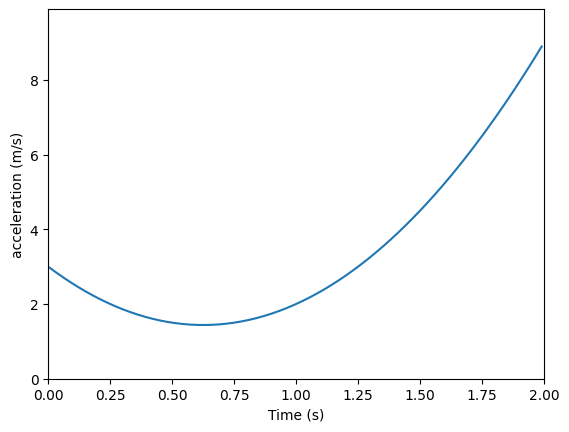

In [6]:
acceleration_vs_time.plot(xlabel = "Time (s)", ylabel = "acceleration (m/s)", xlim=(0, 2), ylim=(0, acceleration_vs_time.max() + 1))

#// in this code cell we use pandas ".plot" function to display our generated data. //

In [7]:
# Now we will use this data to estimate "The area under the curve" (velocity) of this acceleration/time function.

In [ ]:
# The following cell will produce a long output DO NOT GET SCARED (!)
# We chose to show to you this long output so that you realize that,
# although long, it is simple. It is performing the same operation every time.

In [ ]:
# This loop computes the integral of the quadratic function with A, B, C as above
# It does so by computing the area of every narrow (width=0.01 seconds) but tall (height=acceleration in m/s^2) rectangle
# and adding all the areas together

initial_velocity = 0
final_velocity = initial_velocity
final_velocity_list = [] # final_velocity, and initial_velocity set to "0"
for i in range(len(acceleration_vs_time)): #This line defines a "for loop" that will dynamically iterate for every element in our array variable; exactly 200 times in our case here.
  area_of_rectangle = acceleration_vs_time.iloc[i] * resolution # Area of rectangle is modeled by the equation : Length*Width or L*W
  final_velocity = final_velocity + area_of_rectangle #ADD "area_of_rectangle" to the value of "final_velocity"
  final_velocity_list.append(final_velocity) # APPEND new computed velocity value to our array variable "final_velocity_list"
  print("This iteration computes the area of the ", i, "th rectangle")
  print("The area under the curve is the change in velocity (meters per second):", area_of_rectangle) # DISPLAY the area of each rectangle as a concurrent list of the "change in velocities" that occur in our function
  print("The cummulative area under the curve is the overall change in velocity until this point (meters per second):", final_velocity) # finally, this command displays the sum of all of our changes in "velocity", giving us a "final_velocity"\
  print("")



In [ ]:
# This cell allows us to plot the velocity as a function of time

velocity_vs_time = pd.Series(final_velocity_list, index=time_list) #Define a two(2) column array variable consisting of the variables "final_velocity_list" and "time"
velocity_vs_time.plot(xlabel = "Time (s)", ylabel = "velocity (m/s)", xlim=(0, 2), ylim=(0, velocity_vs_time.max() + 1), colormap='RdBu')

In [10]:
# If you believe in calculus, the area under the curve of the
# velocity vs time graph gives you the position
# If you don't believe in calculus, still, the area under the curve of the
# velocity vs time graph gives you the position

In [ ]:
initial_position = 0
final_position = initial_position
final_position_list = []
for i in range(len(velocity_vs_time)): #same size as Velocityvstime array
  area_of_rectangle = velocity_vs_time.iloc[i] * resolution # ΔPOSITION = VELOCITY*RESOLUTION | Areaofrectangle = L*W
  final_position = final_position + area_of_rectangle
  final_position_list.append(final_position)
#  print(area_of_rectangle, "meters")

  print("This iteration computes the area of the ", i, "th rectangle")
  print("The area under the curve is the change in position (meters):", area_of_rectangle)
  print("The cummulative area under the curve is the overall change in position until this point (meters):", final_position)
  print("")


In [12]:
# Adding the areas of all rectangles together
print("Final position is:", final_position, "meters")

Final position is: 4.696699999999999 meters


In [ ]:
# This cell allows us to plot the Position as a function of time

position_vs_time = pd.Series(final_position_list, index=time_list) #Define a two(2) column array variable consisting of the variables "final_velocity_list" and "time"
position_vs_time.plot(xlabel = "Time (s)", ylabel = "position (m)", xlim=(0, 2), ylim=(0, velocity_vs_time.max() + 1), colormap='RdBu')

# Exercise 3.1

3.1.1. Look at the the code that generates the 'final velocity' and the 'final position.' What are their similarities and differences? What mathematical operation do they perform?

.


3.1.2. The acceleration is not constant, so rigurously speaking you can't use the well-known 'kinematic equations.' Nevertheless, the velocity vs time plot consists essentially of 2 segments of constant acceleration (the slope of the velocity), and physics is about separating problems into constituent parts for which you can use simpler models. Below, in the first segment, the slope is:

.

 $ \frac{2.0 \rm{m/s}}{1.25 \rm{s}} = 1.6 \rm{m/s}^2$

.

and the $y$-intercept is $v_0 = 0$ m/s. Since,

.

$x = x_0 + v_0 \Delta t + \frac{1}{2}a (\Delta t)^2 $

.

for this particular case,

.

.

$x =  \frac{1}{2} 1.6 \rm{m/s}^2 (1.25 \rm{s})^2 = 1.25 $ m

.

What is the slope and $y$-intercept of the second segment? Use the appropriate $\Delta t$ to calculate the distance traveled during the second segment and add it to the first segment. Do this with pen and paper.

.

3.1.3. What is the total area under the curve? How does your pen and paper result compare to the numerical result output by the code cell above?

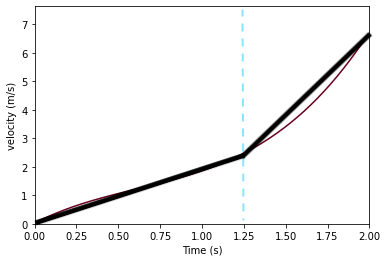

In [ ]:
## 3.1.1 What are the similarities and differences between the codes that
## generate the "final velocity" and the "final position"?
##
## Answer:

In [ ]:
## 3.1.2 What is the slope and y-intercept of the second segment in the
## plot above?
##
## Answer:

In [ ]:
## 3.1.3 What is the area under the curve of the simplified acceleration plot
## above and how does it compare to the numerical results?
##
## Answer: